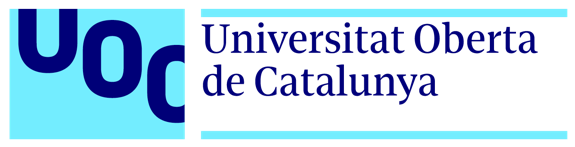

- 1. Carga del set de datos

- 2. Funciones y partición set de datos

- 3. Mejores modelos

- 4. Comparativa calibración y discrminación de los modelos

- 5. Evaluación de episodios por modelo

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Librerías de manipulación de datos
import pandas as pd
import numpy as np
import joblib

# Librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

# Librerías de procesaso de datos
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, balanced_accuracy_score, precision_recall_curve, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.calibration import calibration_curve
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.models import model_from_json
import tensorflow
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# 1. Carga del set de datos

In [2]:
data = pd.read_csv("../data/case_control_episode.csv")
data.head()

,BreastCancer,Age,Family_History,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,episode_7,...,bbd_none,bbd_unknown,bbd_no_proliferative,bbd_proliferative,mf_none,mf_mass,mf_calcification,mf_asymetric_density,mf_distorsion,mf_multiple_patron
0,0.0,0.368421,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.105263,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.052632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.210526,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# 2. Funciones y partición set de datos

In [3]:
def evaluate_model(model, X_test, y_test, modelType):
    """
    Función genérica para evaluar los modelos
    Args:
        model: modelo a aplicar a la búsqueda
        X_test: datos de test de los factores
        y_test: datos de test de la clase
    """
    y_pred_test = model.predict(X_test)
    
    if (modelType == "ann"):
        pred = y_pred_test.flatten()
        y_pred_test = np.where(pred > 0.5, 1, 0)
    
    test_confusion_matrix = confusion_matrix(y_test, y_pred_test)
    
    print("-"*50)
    print("Accuracy en test: ", round(accuracy_score(y_test, y_pred_test), 2))
    print("-"*50)
    print("AUC: ", round(roc_auc_score(y_test, y_pred_test), 2))
    print("-"*50)
    print("Precission: ", round(precision_score(y_test, y_pred_test), 2))
    print("-"*50)
    print("Recall: ", round(recall_score(y_test, y_pred_test), 2))
    print("-"*50)
    print("F1-Score: ", round(f1_score(y_test, y_pred_test), 2))
    print("-"*50)
    print("Clasificación en test: ")
    print(classification_report(y_test, y_pred_test))
    print("-"*50)
    print("Matriz de confusión en test: ")
    print(test_confusion_matrix)
    print("-"*50)
    sns.set(font_scale=1.4)
    sns.heatmap(test_confusion_matrix, annot=True, annot_kws={"size": 12}, fmt="g")
    plt.xlabel("Valores predichos")
    plt.ylabel("Valores reales")
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
    plt.show()


In [4]:
# Partición de los datos en entrenamiento y test con una proporción 85/15

X = data.iloc[:, data.columns != "BreastCancer"].values.astype(float)
y = data.iloc[:, data.columns == "BreastCancer"].values.astype(float)

# Repartición balanceada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

# 3. Mejores modelos

--------------------------------------------------
Accuracy en test:  0.62
--------------------------------------------------
AUC:  0.62
--------------------------------------------------
Precission:  0.62
--------------------------------------------------
Recall:  0.61
--------------------------------------------------
F1-Score:  0.61
--------------------------------------------------
Clasificación en test: 
              precision    recall  f1-score   support

         0.0       0.63      0.64      0.63       925
         1.0       0.62      0.61      0.61       890

    accuracy                           0.62      1815
   macro avg       0.62      0.62      0.62      1815
weighted avg       0.62      0.62      0.62      1815

--------------------------------------------------
Matriz de confusión en test: 
[[589 336]
 [350 540]]
--------------------------------------------------


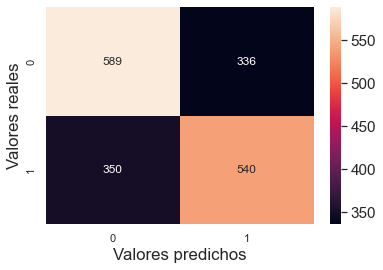

In [5]:
# Árbol de decisión

# Carga el modelo
dt_model = joblib.load("../saved_models/dt_model.joblib")

# Evaluación del modelo
evaluate_model(dt_model, X_test, y_test, 'dt')

--------------------------------------------------
Accuracy en test:  0.61
--------------------------------------------------
AUC:  0.61
--------------------------------------------------
Precission:  0.62
--------------------------------------------------
Recall:  0.56
--------------------------------------------------
F1-Score:  0.59
--------------------------------------------------
Clasificación en test: 
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.64       925
         1.0       0.62      0.56      0.59       890

    accuracy                           0.61      1815
   macro avg       0.61      0.61      0.61      1815
weighted avg       0.61      0.61      0.61      1815

--------------------------------------------------
Matriz de confusión en test: 
[[612 313]
 [390 500]]
--------------------------------------------------


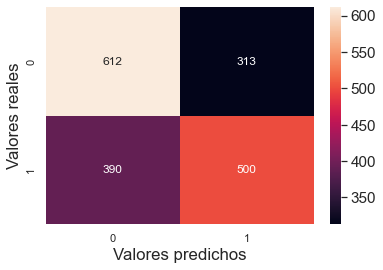

In [6]:
# Máquina de soporte vectorial

# Carga el modelo
svm_model = joblib.load("../saved_models/svm_model.joblib")

# Evaluación del modelo
evaluate_model(svm_model, X_test, y_test, 'svm')

--------------------------------------------------
Accuracy en test:  0.63
--------------------------------------------------
AUC:  0.62
--------------------------------------------------
Precission:  0.65
--------------------------------------------------
Recall:  0.52
--------------------------------------------------
F1-Score:  0.58
--------------------------------------------------
Clasificación en test: 
              precision    recall  f1-score   support

         0.0       0.61      0.73      0.67       925
         1.0       0.65      0.52      0.58       890

    accuracy                           0.63      1815
   macro avg       0.63      0.62      0.62      1815
weighted avg       0.63      0.63      0.62      1815

--------------------------------------------------
Matriz de confusión en test: 
[[674 251]
 [427 463]]
--------------------------------------------------


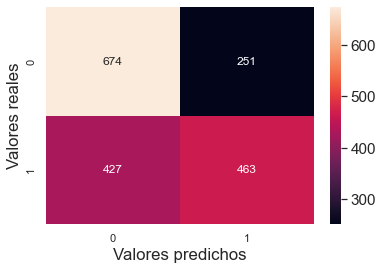

In [7]:
# Red neuronal artificial

# Carga el modelo
json_file = open("../saved_models/ann_model.json", 'r')
ann_model_json = json_file.read()
json_file.close()
ann_model = model_from_json(ann_model_json)
ann_model.load_weights("../saved_models/ann_model.h5")
ann_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy']) ## CAMBIAR EL LR

# Evaluación del modelo
evaluate_model(ann_model, X_test, y_test, 'ann')

# 4. Comparativa calibración y discriminación de los modelos

In [8]:
# Probabilidades y curva de calibración por cada modelo

dt_probs = dt_model.predict_proba(X_test)[:,1]
dt_prob_o, dt_prob_e = calibration_curve(y_test, dt_probs)

svm_probs = svm_model.predict_proba(X_test)[:,1]
svm_prob_o, svm_prob_e = calibration_curve(y_test, svm_probs)

ann_probs = ann_model.predict_proba(X_test)
ann_prob_o, ann_prob_e = calibration_curve(y_test, ann_probs)

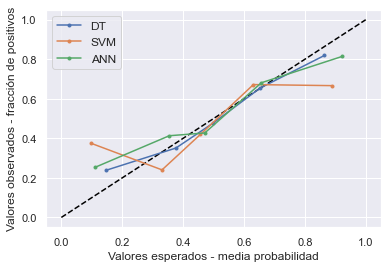

In [9]:
# Visualización de la calibración

plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.plot(dt_prob_e, dt_prob_o, marker='.', label="DT")
plt.plot(svm_prob_e, svm_prob_o, marker='.', label="SVM")
plt.plot(ann_prob_e, ann_prob_o, marker='.', label="ANN")
plt.legend(fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.xlabel("Valores esperados - media probabilidad", fontsize=12)
plt.ylabel("Valores observados - fracción de positivos", fontsize=12)
plt.savefig("../plots/models_calibration.png", bbox_inches="tight")
plt.show()

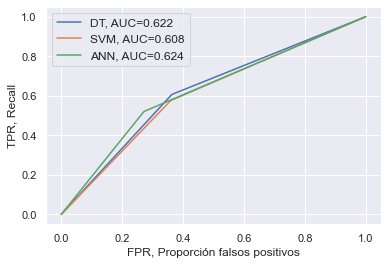

In [10]:
# Curva ROC para la discriminación
plt.figure(figsize=(6,4))

dt_fpr, dt_tpr, dt_ = roc_curve(y_test, dt_probs > 0.5)
dt_auc = round(roc_auc_score(y_test, dt_probs > 0.5), 3)
plt.plot(dt_fpr, dt_tpr,label="DT, AUC=" + str(dt_auc))

svm_fpr, svm_tpr, svm_ = roc_curve(y_test, svm_probs > 0.5)
svm_auc = round(roc_auc_score(y_test, svm_probs > 0.5), 3)
plt.plot(svm_fpr, svm_tpr,label="SVM, AUC=" + str(svm_auc))

ann_fpr, ann_tpr, ann_ = roc_curve(y_test, ann_probs > 0.5)
ann_auc = round(roc_auc_score(y_test, ann_probs > 0.5), 3)
plt.plot(ann_fpr, ann_tpr,label="ANN, AUC=" + str(ann_auc))

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.legend(fontsize=12)
plt.xlabel("FPR, Proporción falsos positivos", fontsize=12)
plt.ylabel("TPR, Recall", fontsize=12)
plt.savefig("../plots/models_roc_curve.png", bbox_inches="tight")
plt.show()

# 5. Evaluación de episodios por modelo

In [11]:
def evaluate_episodes(model, modelType = 'other'):
    """
    Función generada para evaluar los episodios por cada modelo. Acumula muestras
    del conjunto de test para por cada episodio calcualar el AUC así como los
    elementos observados
    Args:
        model: modelo a evaluar
    """
    observed = 0

    for i in range(2, 11):
        X_test_negative = X_test[X_test[:,i] == 0]
        X_test_index_negative = np.where(X_test[:,i] == 0)
        y_test_negative = y_test[X_test_index_negative]
        
        X_test_negative_total = X_test[X_test[:,i+1] == 0]
        X_test_index_negative_total = np.where(X_test[:,i+1] == 0)
        y_test_negative_total = y_test[X_test_index_negative_total]

        if (i == 2):
            X_test_prev_negative = np.concatenate([X_test_negative, X_test_negative_total])
            y_test_prev_negative = np.concatenate([y_test_negative, y_test_negative_total]) 
        else:
            X_test_prev_negative = np.concatenate([X_test_prev_negative, X_test_negative, X_test_negative_total])
            y_test_prev_negative = np.concatenate([y_test_prev_negative, y_test_negative, y_test_negative_total])        
        
        X_test_positive = X_test[X_test[:,i+1] == 1]
        X_test_index_positive = np.where(X_test[:,i+1] == 1)
        y_test_positive = y_test[X_test_index_positive]

        X_test_total = np.concatenate([X_test_prev_negative, X_test_positive])
        y_test_total = np.concatenate([y_test_prev_negative, y_test_positive])

        observed = len(X_test_positive) + observed

        y_pred_test = model.predict(X_test_total)
        
        if (modelType == "ann"):
            pred = y_pred_test.flatten()
            y_pred_test = np.where(pred > 0.5, 1, 0)
            y_proba_test = model.predict_proba(X_test_total).reshape(-1)
        else:
            y_proba_test = model.predict_proba(X_test_total)[:, 1]
        
        
        print("AUC episodio " + str(i) + " ~ " + str((i * 2) - 2) + " años vista: ",
              round(roc_auc_score(y_test_total, y_pred_test)*100, 1))
        
        y_pred_test_expected = model.predict(X_test_positive)
        
        # Eventos observados
        print("Total elementos observados episodio " + str(i) + " : ", observed)  
        print("E/O para el episodio " + str(i) + " es: ",
              round((sum(y_proba_test) / len(y_proba_test))/np.mean(y_test_total), 2))
                
        print("-"*50)

In [12]:
# Evaluación episodios DT
evaluate_episodes(dt_model)

AUC episodio 2 ~ 2 años vista:  62.5
Total elementos observados episodio 2 :  447
E/O para el episodio 2 es:  1.03
--------------------------------------------------
AUC episodio 3 ~ 4 años vista:  62.2
Total elementos observados episodio 3 :  776
E/O para el episodio 3 es:  1.02
--------------------------------------------------
AUC episodio 4 ~ 6 años vista:  62.2
Total elementos observados episodio 4 :  950
E/O para el episodio 4 es:  1.03
--------------------------------------------------
AUC episodio 5 ~ 8 años vista:  62.3
Total elementos observados episodio 5 :  1074
E/O para el episodio 5 es:  1.03
--------------------------------------------------
AUC episodio 6 ~ 10 años vista:  62.2
Total elementos observados episodio 6 :  1147
E/O para el episodio 6 es:  1.03
--------------------------------------------------
AUC episodio 7 ~ 12 años vista:  62.2
Total elementos observados episodio 7 :  1176
E/O para el episodio 7 es:  1.03
--------------------------------------------------

In [13]:
# Evaluación episodios SVM
evaluate_episodes(svm_model)

AUC episodio 2 ~ 2 años vista:  61.5
Total elementos observados episodio 2 :  447
E/O para el episodio 2 es:  1.03
--------------------------------------------------
AUC episodio 3 ~ 4 años vista:  61.2
Total elementos observados episodio 3 :  776
E/O para el episodio 3 es:  1.03
--------------------------------------------------
AUC episodio 4 ~ 6 años vista:  61.1
Total elementos observados episodio 4 :  950
E/O para el episodio 4 es:  1.03
--------------------------------------------------
AUC episodio 5 ~ 8 años vista:  61.3
Total elementos observados episodio 5 :  1074
E/O para el episodio 5 es:  1.03
--------------------------------------------------
AUC episodio 6 ~ 10 años vista:  61.2
Total elementos observados episodio 6 :  1147
E/O para el episodio 6 es:  1.03
--------------------------------------------------
AUC episodio 7 ~ 12 años vista:  61.1
Total elementos observados episodio 7 :  1176
E/O para el episodio 7 es:  1.03
--------------------------------------------------

In [14]:
# Evaluación episodios ANN
evaluate_episodes(ann_model, 'ann')

AUC episodio 2 ~ 2 años vista:  62.9
Total elementos observados episodio 2 :  447
E/O para el episodio 2 es:  1.02
--------------------------------------------------
AUC episodio 3 ~ 4 años vista:  62.4
Total elementos observados episodio 3 :  776
E/O para el episodio 3 es:  1.02
--------------------------------------------------
AUC episodio 4 ~ 6 años vista:  62.4
Total elementos observados episodio 4 :  950
E/O para el episodio 4 es:  1.03
--------------------------------------------------
AUC episodio 5 ~ 8 años vista:  62.5
Total elementos observados episodio 5 :  1074
E/O para el episodio 5 es:  1.02
--------------------------------------------------
AUC episodio 6 ~ 10 años vista:  62.4
Total elementos observados episodio 6 :  1147
E/O para el episodio 6 es:  1.02
--------------------------------------------------
AUC episodio 7 ~ 12 años vista:  62.4
Total elementos observados episodio 7 :  1176
E/O para el episodio 7 es:  1.02
--------------------------------------------------